# Waterfilling Levels

In [1]:
import sys
sys.path.insert(1, '../../functions')
import importlib
import numpy as np
import nbformat
import plotly.express
import plotly.express as px
import pandas as pd
import scipy.optimize as optimization
import food_bank_functions
import food_bank_bayesian
import matplotlib.pyplot as plt
import seaborn as sns
from food_bank_functions import *
from food_bank_bayesian import *
importlib.reload(food_bank_functions)

<module 'food_bank_functions' from '../../functions\\food_bank_functions.py'>

In [2]:
np.random.seed(1)

### Test

In [3]:
n = 6
sorted_distribution = np.asarray([np.arange(2) + 1 for x in range(n)])
weights = np.asarray([np.zeros(2)+0.5 for x in range(n)])
median = np.zeros(n)+1.5
variance = np.zeros(n) + .25
delta = np.zeros(n) + .1

expected_demand = 1.5
max_budget = n * expected_demand

In [4]:
print(median)

[1.5 1.5 1.5 1.5 1.5 1.5]


In [5]:
print(max_budget)

9.0


In [6]:
group_demands = [2, 1, 1, 1, 2, 1]

In [7]:
print(waterfilling_waste(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [8]:
print(greedy(group_demands, max_budget))

[2. 1. 1. 1. 2. 1.]


In [9]:
print(constant_threshold(group_demands,max_budget,expected_demand))

[1.5 1.  1.  1.  1.5 1. ]


In [10]:
print(waterfilling_proportional_remaining(group_demands, max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [11]:
print(waterfilling_et_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [12]:
print(waterfilling_et_full_waste([1.5, 1.5, 1.5, 1.5, 1.5, 1.5],group_demands,max_budget))

[1.5 1.  1.  1.  2.  1. ]


In [13]:
print(waterfilling_hope_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [14]:
print(waterfilling_hope_full_waste_iid([1/2, 1/2], [1, 2], group_demands, max_budget))

[1.85714286 1.         1.         1.         2.         1.        ]


In [15]:
print(max_budget)

9.0


In [16]:
print(max_min_heuristic(group_demands, median, [1.5, 1.5, 1.5, 1.5, 1.5, 1.5], variance, max_budget))

[1.71428571 0.85714286 0.85714286 0.85714286 1.71428571 1.        ]


In [17]:
print(max_budget)

9.0


In [18]:
np.asarray(group_demands) - 1

array([1, 0, 0, 0, 1, 0])

# Experiments

## Varying Number of Groups

In [19]:
num_iterations = 1000
max_n = 100
sorted_distribution = [1, 2]
weights = [1,2]
expected_demand = np.dot([1,2],[1/2, 1/2])
max_budget = max_n*expected_demand

In [20]:
expected_waterfilling_threshold = np.zeros(max_n+1)
num_iterations = 100
for i in np.arange(2, max_n+1):
    for _ in range(num_iterations):
        budget = i * 1.5
        demands = np.random.choice(size=i, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(demands, budget)
        expected_waterfilling_threshold[i] += (1/num_iterations)*max(opt)
print(expected_waterfilling_threshold)

[0.         0.         1.61       1.7325     1.82833333 1.83458333
 1.8535     1.91       1.89938095 1.90675    1.90468254 1.88548016
 1.94652381 1.92118885 1.90884343 1.91893939 1.9246791  1.91915016
 1.93033417 1.90421947 1.92316517 1.92306017 1.94444149 1.95333646
 1.93773036 1.92889383 1.93293316 1.95239338 1.93867888 1.94143684
 1.93207688 1.92658469 1.94257646 1.93812053 1.94642726 1.95465585
 1.93806885 1.9431479  1.9345634  1.95054297 1.95397789 1.95025955
 1.95355116 1.95552092 1.94902682 1.94156474 1.9426031  1.93902016
 1.95786298 1.94590915 1.94810425 1.95631059 1.96687887 1.95676197
 1.95434538 1.95114514 1.94815122 1.9567753  1.94673831 1.94265857
 1.96284691 1.95545779 1.96383376 1.94480715 1.95417826 1.95765221
 1.96087307 1.9495259  1.95108548 1.95325669 1.96225791 1.9608063
 1.95643727 1.95092391 1.95850242 1.96853733 1.96653921 1.96183068
 1.96098643 1.9692931  1.94400798 1.96269041 1.96853552 1.96606878
 1.96333364 1.95966358 1.95838022 1.95559732 1.96505365 1.95027

In [21]:
print(weights)

[1, 2]


### Look at scaling with n

In [22]:
data_dict = {'NumGroups':[], 'Norm':[], 'ET_Online':[],'Hope_Online':[], 'Adapt_Threshold':[], 'Threshold':[], 'Expected_Filling':[], 'Greedy':[], 'ET_Full':[], 'Hope_Full':[], 'Max_Min':[]}
num_iterations = 1000

for n in np.arange(2,max_n+1):
    n = max(int(n),1)
    group_expected_demands = np.zeros(n) + 1.5
    group_median_demands = np.zeros(n) + 1
    group_variance = np.zeros(n) + 0.25
    
    budget = n*1.5
    print(n)
    for i in range(num_iterations):
        
        data_dict['NumGroups'].append(n)
        
        group_demands = np.random.choice(size=n, a=[1.,2.], p=[1/2, 1/2])
        opt = waterfilling_waste(group_demands,budget)
     
        hope_sol = waterfilling_hope_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        hope_full_sol = waterfilling_hope_full_waste_iid([1/2, 1/2], [1, 2], group_demands, budget)
        dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
        et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
        proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
        greed_sol = greedy(group_demands,budget)
        threshold = constant_threshold(group_demands,budget,expected_demand)
        expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
        max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)
      
        
        data_dict['Norm'].append('L1')
        data_dict['Hope_Online'].append(np.sum(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.sum(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.sum(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.sum(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.sum(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.sum(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.sum(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.sum(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.sum(np.absolute(opt-max_min_heuristic_sol)))

        data_dict['NumGroups'].append(n)
        data_dict['Norm'].append('Linf')
        data_dict['Hope_Online'].append(np.max(np.absolute(opt - hope_sol)))
        data_dict['ET_Online'].append(np.max(np.absolute(opt-dynamic)))
        data_dict['Adapt_Threshold'].append(np.max(np.absolute(opt - proportional_threshold)))
        data_dict['Greedy'].append(np.max(np.absolute(opt-greed_sol)))
        data_dict['Threshold'].append(np.max(np.absolute(opt-threshold)))
        data_dict['ET_Full'].append(np.max(np.absolute(opt-et_full)))
        data_dict['Hope_Full'].append(np.max(np.absolute(opt-hope_full_sol)))
        data_dict['Expected_Filling'].append(np.max(np.absolute(opt - expect_threshold)))
        data_dict['Max_Min'].append(np.max(np.absolute(opt-max_min_heuristic_sol)))

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [23]:
df = pd.DataFrame(data_dict).melt(id_vars=["NumGroups", 'Norm'])

In [24]:
df.to_csv('scale_with_n.csv')

In [25]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [26]:
df.head

<bound method NDFrame.head of          NumGroups  Norm   variable     value
0                2    L1  ET_Online  0.000000
1                2  Linf  ET_Online  0.000000
2                2    L1  ET_Online  0.000000
3                2  Linf  ET_Online  0.000000
4                2    L1  ET_Online  0.000000
...            ...   ...        ...       ...
1781995        100  Linf    Max_Min  1.309470
1781996        100    L1    Max_Min  3.241891
1781997        100  Linf    Max_Min  0.046854
1781998        100    L1    Max_Min  1.706472
1781999        100  Linf    Max_Min  0.019840

[1782000 rows x 4 columns]>

<AxesSubplot:title={'center':'Simple Distribution L1'}, xlabel='NumGroups', ylabel='value'>

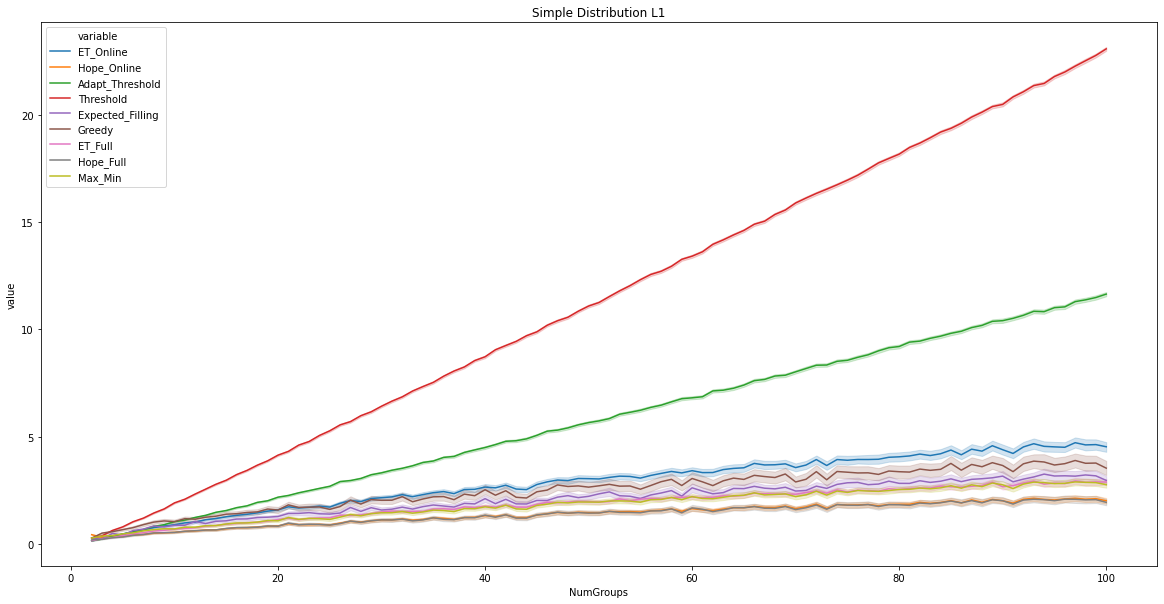

In [27]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution L1')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'L1'])

<AxesSubplot:title={'center':'Simple Distribution LInf'}, xlabel='NumGroups', ylabel='value'>

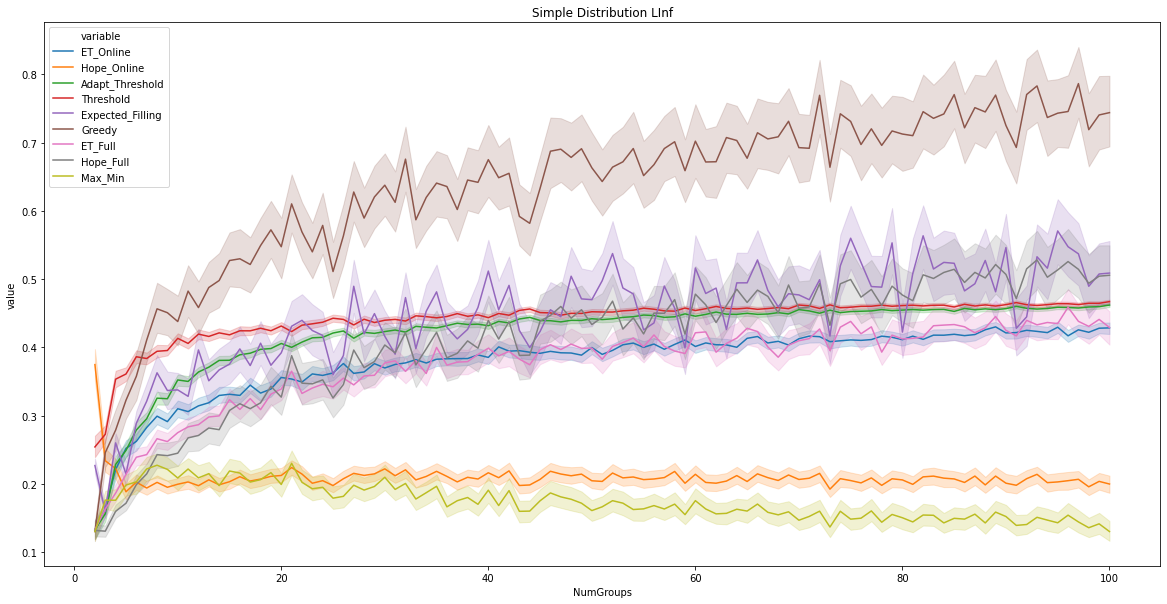

In [28]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
plt.figure(figsize=(20,10))
plt.title('Simple Distribution LInf')
sns.lineplot(x='NumGroups', y='value', hue='variable', data=df[df.Norm == 'Linf'])

In [29]:
data_dict = {'Group':[], 'Hope_Full':[], 'Hope_Online':[],'ET_Full':[], 'ET_Online':[], 'True':[], 'Max_Min':[]}
num_iterations = 1000


for i in range(num_iterations):
    max_n = 100
    
    weights = [1/2, 1/2]
    sorted_support = [1., 2.]
    expected_demands = [1.5 for x in range(max_n)]
    median_demands = [1. for _ in range(max_n)]
    variance = [.25 for _ in range(max_n)]
    
    
    # print(weights)
    # print(sorted_support)
    # print(expected_demands)
    max_budget = max_n*1.5
    
    
    
    group_demands = np.random.choice(size=max_n, a=sorted_support, p=weights).astype(np.float)
    print('Demands for experiment:' + str(group_demands))   
    
    et_full = np.copy(expected_demands)
    et_online = np.sort(np.copy(expected_demands))
    
    et_online_budget = max_budget
    hope_online_budget = max_budget

    hope_online_support = np.copy(sorted_support)
    hope_online_vals = np.copy(weights)*max_n
    
    hope_full_support = np.copy(sorted_support)
    hope_full_vals = np.copy(weights)*max_n

    max_min_budget = max_budget
    min_fill = 1.

    for n in range(max_n):
        # Solve for the various waterfilling levels
        data_dict['Group'].append(n)
        
        # Adds on the true waterfilling level
        data_dict['True'].append(max(waterfilling_sorted(np.sort(np.copy(group_demands)), max_budget)))
        
        
        # et_Full
        
        # Replaces current town's demand with realized demand
        et_full[n] = group_demands[n]
        # Sorts demands
        et_full_sorted = np.sort(np.copy(et_full))
        # Appends maximum allocation based on full demand with full budget
        data_dict['ET_Full'].append(max(waterfilling_sorted(et_full_sorted, max_budget)))
            
            
        # et_Online
        
        # Removes expected demand for current agent from list
        et_online = delete_sorted(et_online, expected_demands[n])
        
        # adds in the demand for current location
        new_sorted_list, index = insert_sorted(et_online, group_demands[n])
        tmp_sol = waterfilling_sorted(new_sorted_list, et_online_budget)
        data_dict['ET_Online'].append(max(tmp_sol))
        # subtracts off the allocation for the next round
        et_online_budget -= min(tmp_sol[index], et_online_budget, group_demands[n])
        
        
        # hope_Full
        
        # Updating the weights for the observed group
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(hope_full_support - obs_demand))
        hope_full_vals -= weights
        hope_full_vals[index] += 1
        
        data_dict['Hope_Full'].append(max(waterfilling_sorted_weights(hope_full_support, hope_full_vals, max_budget)))

        
        # hope_Online
        obs_demand = group_demands[n]
        
        index = np.argmin(np.abs(hope_online_support - obs_demand))
        hope_online_vals -= weights
        hope_online_vals[index] += 1        
        
        
        tmp_sol = waterfilling_sorted_weights(hope_online_support, hope_online_vals, hope_online_budget)
        hope_online_budget -= min(obs_demand, hope_online_budget, tmp_sol[index])
        
        hope_online_vals[index] -= 1
        data_dict['Hope_Online'].append(max(tmp_sol))
        
        
        # Max_Min
        
        if n == max_n - 1:
            data_dict['Max_Min'].append(min(max_min_budget, group_demands[n]))
        else:
            delta = (median_demands[n] - median_demands[n+1]) / ((1/2)* (median_demands[n] + median_demands[n+1]))
            budget_portion = max_min_budget * (expected_demands[n] + expected_demands[n+1]) / np.sum(expected_demands[n:])
            heuristic_threshold = budget_portion * (group_demands[n] / (group_demands[n] + median_demands[n+1] + delta * np.sqrt(variance[n+1])))
            allocation = min(heuristic_threshold, min_fill*group_demands[n], max_min_budget)
            data_dict['Max_Min'].append(heuristic_threshold)
            
            if allocation / group_demands[n] <= min_fill:
                min_fill = allocation / group_demands[n]
            max_min_budget -= allocation

Demands for experiment:[1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 2.
 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2.
 2. 1. 1. 2.]
Demands for experiment:[2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2.
 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1.
 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2.
 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.
 2. 2. 1. 2.]
Demands for experiment:[1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1.
 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1.
 2. 2. 1. 2.]
Demands for e

 2. 2. 1. 2.]
Demands for experiment:[1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1.]
Demands for experiment:[2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1.
 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1.
 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1.
 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 1. 1.]
Demands for experiment:[1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1.
 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 1. 2.]

 1. 2. 2. 1.]
Demands for experiment:[2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1.
 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 1. 1. 2.]
Demands for experiment:[2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1.
 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2.
 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1.
 2. 2. 1. 1.]
Demands for experiment:[2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1.
 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1.
 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 1. 1.]

 2. 2. 2. 1.]
Demands for experiment:[1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2.
 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1.
 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1.
 2. 2. 2. 1.]
Demands for experiment:[2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2.
 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1.
 1. 2. 2. 1.]
Demands for experiment:[2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1.
 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2.
 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2.
 1. 2. 1. 2.]

Demands for experiment:[2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2.
 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2.
 1. 2. 2. 1.]
Demands for experiment:[2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2.
 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2.
 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 2.]
Demands for experiment:[2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2.
 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1.
 2. 2. 1. 2.]
Demands for e

Demands for experiment:[2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2.
 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1.
 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2.
 1. 2. 2. 1.]
Demands for experiment:[1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1.
 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1.
 2. 2. 2. 1.]
Demands for experiment:[2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1.
 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1.
 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2.
 1. 1. 2. 1.]
Demands for e

 1. 2. 1. 1.]
Demands for experiment:[2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2.
 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1.
 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1.
 1. 1. 2. 1.]
Demands for experiment:[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2.
 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1.
 2. 1. 1. 1.]
Demands for experiment:[2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1.
 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2.
 1. 2. 2. 2.]

 1. 2. 2. 1.]
Demands for experiment:[1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2.
 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 2. 2. 1. 2.]
Demands for experiment:[2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2.
 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2.
 2. 1. 2. 2.]
Demands for experiment:[1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1.
 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 2. 1.]

 2. 1. 1. 1.]
Demands for experiment:[2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.
 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 1. 1.]
Demands for experiment:[2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2.
 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1.
 1. 2. 1. 2.]
Demands for experiment:[1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1.
 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2.
 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1.
 2. 2. 2. 2.]

Demands for experiment:[2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2.
 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1.
 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1.
 2. 2. 1. 2.]
Demands for experiment:[1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2.
 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 2.]
Demands for experiment:[1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1.
 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2.
 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 2.]
Demands for e

Demands for experiment:[2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2.
 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2.
 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1.]
Demands for experiment:[1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1.
 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2.
 1. 1. 2. 2.]
Demands for experiment:[1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2.
 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1.
 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2.
 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2.
 1. 2. 2. 2.]
Demands for e

 1. 2. 2. 1.]
Demands for experiment:[1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1.
 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1.
 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1.
 1. 2. 1. 1.]
Demands for experiment:[1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1.
 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1.
 2. 1. 2. 2.]
Demands for experiment:[2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2.
 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2.
 1. 1. 2. 1.]

 2. 1. 1. 2.]
Demands for experiment:[2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 2.]
Demands for experiment:[1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2.
 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 2. 2.]
Demands for experiment:[1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1.
 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2.
 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1.]

 1. 2. 1. 2.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2.
 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2.
 1. 2. 2. 2.]
Demands for experiment:[1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1.
 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 2. 1. 1. 2.]
Demands for experiment:[2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2.
 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1.
 2. 2. 2. 2.]

 1. 2. 1. 2.]
Demands for experiment:[2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1.
 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 2.]
Demands for experiment:[1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2.
 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1.
 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2.
 1. 2. 2. 1.]
Demands for experiment:[1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2.
 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2.
 2. 1. 2. 1.]

 1. 2. 1. 2.]
Demands for experiment:[1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1.
 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1.
 2. 2. 1. 2.]
Demands for experiment:[2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2.
 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1.
 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1.
 2. 2. 2. 2.]
Demands for experiment:[2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2.
 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1.
 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2.
 1. 1. 1. 2.]

 1. 1. 1. 2.]
Demands for experiment:[2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2.
 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2.
 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1.
 1. 1. 1. 1.]
Demands for experiment:[1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1.
 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2.
 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2.
 1. 2. 2. 2.]
Demands for experiment:[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2.
 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2.
 1. 2. 2. 1.]

Demands for experiment:[1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2.
 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1.
 2. 2. 1. 1.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1.
 1. 1. 2. 2.]
Demands for experiment:[2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1.
 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 2.]
Demands for e

 2. 2. 2. 2.]
Demands for experiment:[2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1.
 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 2.]
Demands for experiment:[1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2.
 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1.
 1. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2.
 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2.
 2. 2. 2. 2.]
Demands for experiment:[2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1.
 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1.
 2. 2. 2. 1.]

 1. 1. 1. 1.]
Demands for experiment:[1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2.
 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1.
 1. 2. 1. 1.]
Demands for experiment:[2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2.
 2. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 2. 2. 2. 1.]
Demands for experiment:[1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1.
 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2.
 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1.
 2. 2. 2. 1.]

 2. 1. 1. 2.]
Demands for experiment:[1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2.
 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2.
 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2.]
Demands for experiment:[2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2.
 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2.
 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 2.]
Demands for experiment:[2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1.
 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1.
 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2.
 1. 1. 1. 1.]

Demands for experiment:[2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2.
 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1.
 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1.
 2. 2. 2. 2.]
Demands for experiment:[2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 1. 2.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1.
 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2.
 1. 2. 2. 2.]
Demands for experiment:[1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2.
 2. 1. 2. 1.]
Demands for e

 2. 1. 1. 1.]
Demands for experiment:[2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1.
 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1.
 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2.
 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2.
 1. 1. 1. 1.]
Demands for experiment:[1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1.
 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2.
 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2.
 2. 1. 1. 1.]
Demands for experiment:[1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1.
 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1.
 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2.
 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2.
 1. 1. 2. 2.]

 2. 2. 1. 1.]
Demands for experiment:[2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1.
 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1.
 1. 2. 1. 1.]
Demands for experiment:[1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2.
 1. 2. 2. 1.]
Demands for experiment:[1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2.
 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 2. 2.]

 1. 1. 2. 2.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1.
 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2.
 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2.
 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 2. 1.]
Demands for experiment:[2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1.
 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1.
 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1.
 1. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2.
 1. 2. 2. 1.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 2. 2. 1. 1.]

 2. 1. 1. 2.]
Demands for experiment:[1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2.
 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1.
 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1.
 1. 1. 1. 2.]
Demands for experiment:[1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2.
 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2.
 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2.
 1. 2. 1. 1.]
Demands for experiment:[1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1.
 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2.
 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 2. 2. 2.]

 2. 2. 1. 2.]
Demands for experiment:[1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1.
 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2.
 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2.
 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 2. 1.
 1. 2. 1. 1.]
Demands for experiment:[2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1.
 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2.
 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 2. 2. 1. 1.]
Demands for experiment:[1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1.
 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2.
 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2.
 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 2. 1.]

 1. 2. 1. 1.]
Demands for experiment:[1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1.
 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2.
 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1.
 2. 2. 1. 1.]
Demands for experiment:[1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2.
 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2.
 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1.
 2. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2.
 1. 1. 1. 1.]
Demands for experiment:[1. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2.
 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1.
 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2.
 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 2.
 1. 1. 2. 2.]

 1. 1. 2. 2.]
Demands for experiment:[1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1.
 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1.
 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2.
 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 2. 1.]
Demands for experiment:[2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1.
 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2.
 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2.
 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2.
 2. 1. 1. 2.]
Demands for experiment:[1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.
 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2.
 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 1.
 2. 2. 1. 1.]

 2. 1. 2. 2.]
Demands for experiment:[1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2.
 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 1.]
Demands for experiment:[1. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2.
 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2.
 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1.
 2. 2. 1. 2.]
Demands for experiment:[2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1.
 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2.
 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1.
 2. 2. 2. 1.]

Demands for experiment:[1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1.
 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 2. 1.
 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2.
 2. 1. 1. 2.]
Demands for experiment:[1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1.
 2. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1.
 2. 2. 1. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 2.]
Demands for experiment:[1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2.
 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1.
 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2.
 1. 1. 1. 1.]
Demands for e

 1. 1. 2. 2.]
Demands for experiment:[2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1.
 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2.
 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1.
 2. 1. 2. 1.]
Demands for experiment:[2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 1.
 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 1. 2. 1.]
Demands for experiment:[2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1.
 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1.
 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 1.]

 1. 2. 2. 2.]
Demands for experiment:[1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1.
 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 2.
 1. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1.
 2. 2. 2. 1.]
Demands for experiment:[1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1.
 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2.
 1. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 1.]
Demands for experiment:[1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2.
 1. 1. 1. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2.
 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1.
 1. 2. 2. 1.]

 2. 2. 1. 1.]
Demands for experiment:[2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2.
 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 1. 2. 2. 2. 1.
 1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2.
 1. 2. 1. 2.]
Demands for experiment:[1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1.
 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1.
 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 1.]
Demands for experiment:[1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2.
 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 2.
 1. 2. 1. 2.]

 1. 1. 1. 1.]
Demands for experiment:[1. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2.
 1. 2. 1. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1.
 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2.
 2. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1.
 2. 1. 1. 1.]
Demands for experiment:[2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 2.
 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2.
 1. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1.
 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2.]
Demands for experiment:[2. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2.
 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1.
 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1.
 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

 2. 1. 1. 2.]
Demands for experiment:[2. 1. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1.
 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1.
 2. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2.
 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 2. 1. 1.]
Demands for experiment:[2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2. 2.
 2. 1. 1. 2.]
Demands for experiment:[2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 2. 2. 1. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2.
 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2.
 1. 2. 2. 2.]

 2. 2. 2. 1.]
Demands for experiment:[1. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 1.
 2. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2.
 1. 1. 1. 2.]
Demands for experiment:[2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1.
 2. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2.
 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2. 2.
 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 1. 1. 1. 2. 1.
 1. 2. 2. 1.]
Demands for experiment:[1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2.
 2. 2. 1. 1. 2. 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 2.
 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 1. 1. 2.]

 2. 2. 2. 1.]
Demands for experiment:[1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 1.
 1. 1. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2.
 2. 2. 1. 2. 1. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 2.]
Demands for experiment:[2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 2. 1.
 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1.
 2. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 1. 2. 2. 2. 2.
 1. 1. 2. 1.]
Demands for experiment:[2. 2. 1. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2.
 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1. 1. 1. 2. 2.
 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2.
 1. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 2. 1. 2. 1. 2. 2.
 1. 2. 1. 1.]

 1. 1. 1. 2.]
Demands for experiment:[1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 1. 2.
 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2.
 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 2.
 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1.
 2. 1. 2. 2.]
Demands for experiment:[2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1. 1.
 2. 2. 2. 2. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1.
 1. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 1. 2. 1.
 2. 2. 2. 1.]
Demands for experiment:[2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2.
 2. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2. 2. 1. 1.
 2. 2. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2.
 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 1. 2. 1. 1.]

In [30]:
np.std(data_dict['True'])

0.05019072427220492

In [31]:
df.columns

Index(['NumGroups', 'Norm', 'variable', 'value'], dtype='object')

In [32]:
df = pd.DataFrame(data_dict).melt(id_vars="Group")

In [33]:
df.to_csv('comparison_of_waterfilling_levels.csv')

Text(0.5, 0, 'Estimated Level')

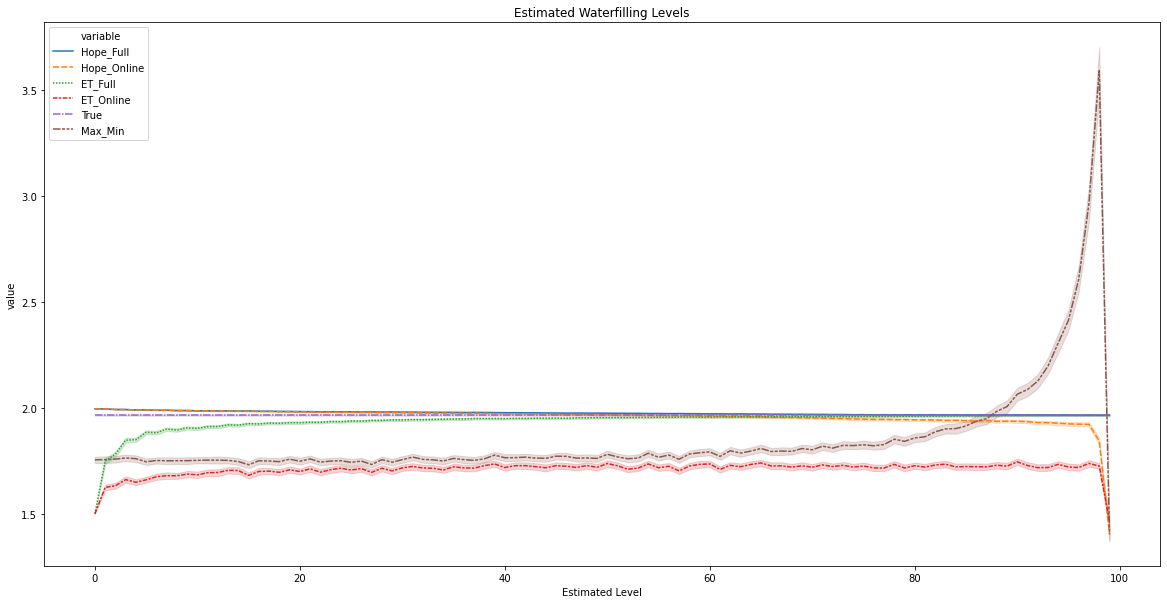

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Group', y='value', style='variable', hue = 'variable', data=df)
plt.title('Estimated Waterfilling Levels')
plt.xlabel('Estimated Level')

### Calculating Fairness Statistics


In [35]:
num_iterations = 1000
weights = [1/2, 1/2]
sorted_distribution = [1., 2.]
expected_demand = np.dot(weights, sorted_distribution)
n=100

In [36]:
group = np.arange(n)
group_expected_demands = np.zeros(n) + expected_demand
budget = expected_demand*n
score_hope_online = np.zeros((n,num_iterations))
score_hope_full = np.zeros((n,num_iterations))
score_et_online = np.zeros((n,num_iterations))
score_et_full = np.zeros((n,num_iterations))
score_greedy = np.zeros((n,num_iterations))
score_adapt_threshold = np.zeros((n,num_iterations))
score_fixed_threshold = np.zeros((n,num_iterations))
score_expect_threshold = np.zeros((n,num_iterations))
score_max_min = np.zeros((n, num_iterations))

# 8 different algorithms
env = np.zeros((11,num_iterations))
po = np.zeros((11,num_iterations))
prop = np.zeros((11,num_iterations))
linf = np.zeros((11,num_iterations))
l1 = np.zeros((11, num_iterations))
max_min = np.zeros((11, num_iterations))

for i in range(num_iterations):
    budget = n*np.dot(weights, sorted_distribution)

        
    group_demands = np.random.choice(size=n, a=sorted_distribution, p=weights)
    
    group_median_demands = np.zeros(n) + 1.
    group_variance = np.zeros(n) + 0.25
    delta = np.zeros(n) + .1
    
    opt = waterfilling_waste(group_demands,budget)

    hope_sol = waterfilling_hope_waste_iid(weights, sorted_distribution, group_demands, budget)
    hope_full_sol = waterfilling_hope_full_waste_iid(weights, sorted_distribution, group_demands, budget)
    dynamic = waterfilling_et_waste(group_expected_demands,group_demands,budget)
    et_full = waterfilling_et_full_waste(group_expected_demands, group_demands, budget)
    proportional_threshold = waterfilling_proportional_remaining(group_demands, budget)
    greedy_sol = greedy(group_demands,budget)
    threshold = constant_threshold(group_demands,budget,expected_demand)
    expect_threshold = constant_threshold(group_demands, budget, expected_waterfilling_threshold[n])
    max_min_heuristic_sol = max_min_heuristic(group_demands, group_median_demands, group_expected_demands, group_variance, budget)

    # comparing hope_online
    
    score_hope_online[:,i] = opt - hope_sol
    env[0,i] = max(0,np.amax(envy_utility(hope_sol,group_demands)))
    po[0,i] = excess(hope_sol,budget)
    prop[0,i] = np.amax(proportionality_utility(hope_sol,group_demands,budget))
    max_min[0,i] = np.min(utility_ratio(hope_sol, group_demands, budget))
    linf[0,i] = np.amax(np.abs(score_hope_online[:,i]))
    l1[0,i] = np.sum(np.abs(score_hope_online[:,i]))
    
    
    # comparing hope_full
    
    score_hope_full[:,i] = opt - hope_full_sol
    env[1,i] = max(0,np.amax(envy_utility(hope_full_sol,group_demands)))
    po[1,i] = excess(hope_full_sol,budget)
    prop[1,i] = np.amax(proportionality_utility(hope_full_sol,group_demands,budget))
    max_min[1,i] = np.min(utility_ratio(hope_full_sol, group_demands, budget))
    linf[1,i] = np.amax(np.abs(score_hope_full[:,i]))
    l1[1,i] = np.sum(np.abs(score_hope_full[:,i]))    
    
    # comparing et_online
    
    score_et_online[:,i] = opt - dynamic
    env[2,i] = max(0,np.amax(envy_utility(dynamic,group_demands)))
    po[2,i] = excess(dynamic,budget)
    prop[2,i] = np.amax(proportionality_utility(dynamic,group_demands,budget))
    max_min[2,i] = np.min(utility_ratio(dynamic, group_demands, budget))
    linf[2,i] = np.amax(np.abs(score_et_online[:,i]))
    l1[2,i] = np.sum(np.abs(score_et_online[:,i]))       
    
    # comparing et_full
    
    score_et_full[:,i] = opt - et_full
    env[3,i] = max(0,np.amax(envy_utility(et_full,group_demands)))
    po[3,i] = excess(et_full,budget)
    prop[3,i] = np.amax(proportionality_utility(et_full,group_demands,budget))
    max_min[3,i] = np.min(utility_ratio(et_full, group_demands, budget))
    linf[3,i] = np.amax(np.abs(score_et_full[:,i]))
    l1[3,i] = np.sum(np.abs(score_et_full[:,i]))     
    
    # comparing greedy
    
    score_greedy[:,i] = opt - greedy_sol
    env[4,i] = max(0,np.amax(envy_utility(greedy_sol,group_demands)))
    po[4,i] = excess(greedy_sol,budget)
    prop[4,i] = np.amax(proportionality_utility(greedy_sol,group_demands,budget))
    max_min[4,i] = np.min(utility_ratio(greedy_sol, group_demands, budget))
    linf[4,i] = np.amax(np.abs(score_greedy[:,i]))
    l1[4,i] = np.sum(np.abs(score_greedy[:,i])) 
    
    # comparing fixed_threshold
    
    score_fixed_threshold[:,i] = opt - threshold
    env[5,i] = max(0,np.amax(envy_utility(threshold,group_demands)))
    po[5,i] = excess(threshold,budget)
    prop[5,i] = np.amax(proportionality_utility(threshold,group_demands,budget))
    max_min[5,i] = np.min(utility_ratio(threshold, group_demands, budget))
    linf[5,i] = np.amax(np.abs(score_fixed_threshold[:,i])    )
    l1[5,i] = np.sum(np.abs(score_fixed_threshold[:,i]))     
    
    # comparing adaptive_threshold
    
    score_adapt_threshold[:,i] = opt - proportional_threshold
    env[6,i] = max(0,np.amax(envy_utility(proportional_threshold,group_demands)))
    po[6,i] = excess(proportional_threshold,budget)
    prop[6,i] = np.amax(proportionality_utility(proportional_threshold,group_demands,budget))
    max_min[6,i] = np.min(utility_ratio(proportional_threshold, group_demands, budget))
    linf[6,i] = np.amax(np.abs(score_adapt_threshold[:,i]))    
    l1[6,i] = np.sum(np.abs(score_adapt_threshold[:,i]))   
    
    # comparing expected_threshold
    
    score_expect_threshold[:,i] = opt - expect_threshold
    env[7,i] = max(0,np.amax(envy_utility(expect_threshold,group_demands)))
    po[7,i] = excess(expect_threshold,budget)
    prop[7,i] = np.amax(proportionality_utility(expect_threshold,group_demands,budget))
    max_min[7,i] = np.min(utility_ratio(expect_threshold, group_demands, budget))
    linf[7,i] = np.amax(np.abs(score_expect_threshold[:,i]))
    l1[7,i] = np.sum(np.abs(score_expect_threshold[:,i]))    

    # comparing max_min_heurstic
    
    score_max_min[:,i] = opt - max_min_heuristic_sol
    env[8,i] = max(0,np.amax(envy_utility(max_min_heuristic_sol,group_demands)))
    po[8,i] = excess(max_min_heuristic_sol,budget)
    prop[8,i] = np.amax(proportionality_utility(max_min_heuristic_sol,group_demands,budget))
    max_min[8,i] = np.min(utility_ratio(max_min_heuristic_sol, group_demands, budget))
    linf[8,i] = np.amax(np.abs(score_max_min[:,i]))
    l1[8,i] = np.sum(np.abs(score_max_min[:,i]))    
    

In [37]:
score_hope_online = np.average(score_hope_online, axis=1)
score_hope_full = np.average(score_hope_full, axis=1)
score_et_online = np.average(score_et_online, axis=1)
score_et_full = np.average(score_et_full, axis=1)
score_greedy = np.average(score_greedy, axis=1)
score_adapt_threshold = np.average(score_adapt_threshold, axis=1)
score_fixed_threshold = np.average(score_fixed_threshold, axis=1)
score_expect_threshold = np.average(score_expect_threshold, axis=1)
score_max_min = np.average(score_max_min, axis=1)


env_std = np.std(env, axis=1)
po_std = np.std(po, axis=1)
prop_std = np.std(prop, axis=1)
linf_std = np.std(linf, axis=1)
max_min_std = np.std(max_min, axis=1)
l1_std = np.std(l1, axis=1)

env = np.average(env,axis=1)
po = np.average(po,axis=1)
prop = np.average(prop,axis=1)
linf = np.average(linf,axis=1)
l1 = np.average(l1, axis=1)
max_min = np.average(max_min, axis=1)

In [38]:
print('hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min')
print('envy:')
print(env)
print(env_std * 1.96 / np.sqrt(num_iterations))
print('po')
print(po)
print(po_std * 1.96 / np.sqrt(num_iterations))
print('prop')
print(prop)
print(prop_std * 1.96 / np.sqrt(num_iterations))
print('sum')
print(env+po+prop)
print('max_min')
print(max_min)
print(max_min_std * 1.96 / np.sqrt(num_iterations))
print('linf')
print(linf)
print(linf_std * 1.96 / np.sqrt(num_iterations))
print('l1')
print(l1)
print(l1_std * 1.96 / np.sqrt(num_iterations))

hope_online, hope_full, et_online, et_full, greedy, fixed_threshold, adaptive_threshold, expected_threshold, max_min
envy:
[0.11958497 0.32095314 0.23325    0.24457677 0.4425     0.
 0.24725389 0.303257   0.08100578 0.         0.        ]
[0.00725194 0.02594949 0.00387413 0.01456796 0.03023383 0.
 0.00025643 0.0272835  0.00806786 0.         0.        ]
po
[0.02484183 0.0225087  0.03758    0.04000474 0.0196     0.250135
 0.12752169 0.02928072 0.03191654 0.         0.        ]
[0.00173383 0.00179279 0.00184687 0.00199495 0.00178203 0.00150844
 0.0019742  0.00208199 0.0018325  0.         0.        ]
prop
[0.01370139 0.26551008 0.         0.08009908 0.4115     0.
 0.         0.27597768 0.06464312 0.         0.        ]
[0.00228371 0.02438557 0.         0.01497866 0.0289999  0.
 0.         0.02590935 0.00549609 0.         0.        ]
sum
[0.15812819 0.60897192 0.27083    0.36468058 0.8736     0.250135
 0.37477557 0.60851541 0.17756545 0.         0.        ]
max_min
[0.88028714 0.67882409 0.

In [39]:
data_dict = {'Agent':group, 'Hope_Online': score_hope_online, 'Hope_Full':score_hope_full, 'ET_Online':score_et_online, 'ET_Full':score_et_full, 'Greedy':score_greedy, 'Adapt_Threshold': score_adapt_threshold, 'Fixed_Threshold': score_fixed_threshold, 'Expect_Threshold':score_expect_threshold, 'Max_Min':score_max_min}
df_uniform = pd.DataFrame(data_dict).melt(id_vars="Agent")

In [40]:
df_uniform.to_csv('fairness_group_by_group.csv')

Text(0.5, 0, 'Value')

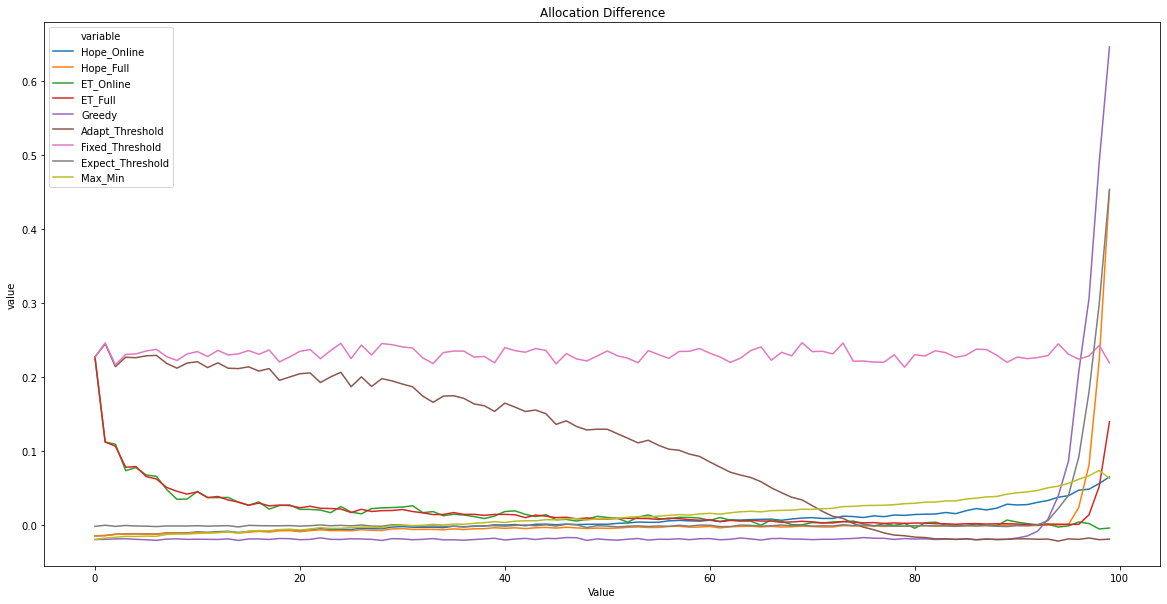

In [41]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Agent', y='value', hue = 'variable', data=df_uniform)
plt.title('Allocation Difference')
plt.xlabel('Value')